<a href="https://colab.research.google.com/github/young78703/young78703.github.io/blob/main/kc_house_data_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
# For Notebooks
init_notebook_mode(connected=True)
# For offline use
cf.go_offline()

In [ ]:
sns.set_style('darkgrid')
sns.set_context('notebook')

In [ ]:
df = pd.read_csv('kc_house_data.csv')


In [ ]:
import pandas as pd
import numpy as np

def impute_nulls(df):
    """
    Impute null values in a Pandas DataFrame based on the data type of each column.
    - For float columns, impute with the mean.
    - For integer columns, impute with the median.
    - For object columns, impute with the mode.
    - For datetime columns, impute with the most recent or most frequent date.
    - For timedelta columns, impute with the mode.
    - For bool columns, impute with the mode.
    - For category columns, impute with the mode.
    - For complex columns, impute with the mean.
    """
    # Get data types of all columns
    dtypes = df.dtypes

    # Iterate over all columns
    for col in df.columns:
        # Check if column contains null values
        if df[col].isnull().sum() > 0:
            # Get data type of column
            dtype = dtypes[col]
            # Impute null values based on data type
            if dtype == 'float64' or dtype == 'float32' or dtype == 'float16':
                df[col].fillna(df[col].mean(), inplace=True)
            elif dtype == 'int64' or dtype == 'int32' or dtype == 'int16' or dtype == 'int8':
                df[col].fillna(df[col].median(), inplace=True)
            elif dtype == 'object':
                df[col].fillna(df[col].mode()[0], inplace=True)
            elif dtype == 'datetime64':
                df[col].fillna(method='bfill', inplace=True)
            elif dtype == 'timedelta64':
                df[col].fillna(df[col].mode()[0], inplace=True)
            elif dtype == 'bool':
                df[col].fillna(df[col].mode()[0], inplace=True)
            elif dtype.name == 'category':
                df[col].fillna(df[col].mode()[0], inplace=True)
            elif dtype == 'complex64' or dtype == 'complex128':
                df[col].fillna(df[col].mean(), inplace=True)
    return df

In [ ]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
imput_nulls (df)

In [ ]:
# convert the date column to datetime type
df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)
# extract the year and time parts as new columns
df['year'] = df['date'].dt.year
df['month']= df['date'].dt.month
df['dayofweek'] = df['date'].dt.weekday

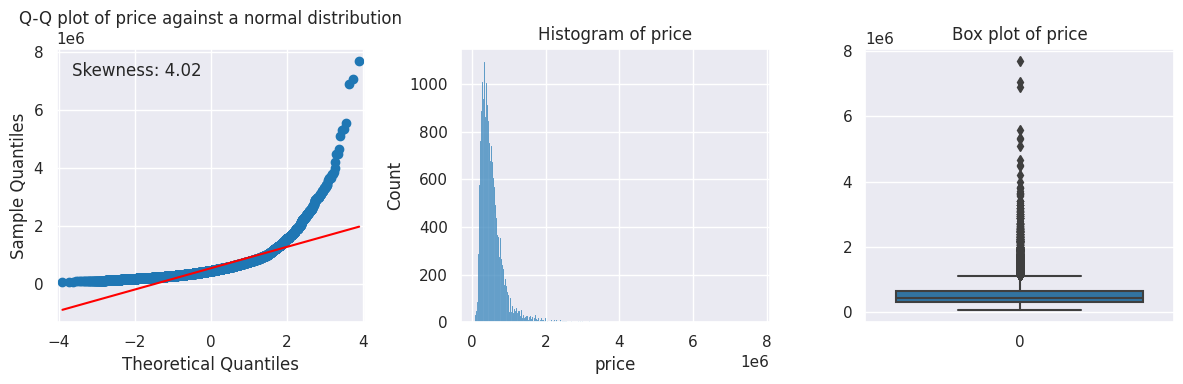

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import skew

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Q-Q plot
sm.qqplot(df['price'], line='s', ax=axes[0])
axes[0].set_title('Q-Q plot of price against a normal distribution')
skewness = skew(df['price'])
axes[0].text(0.05, 0.95, f"Skewness: {skewness:.2f}", transform=axes[0].transAxes, ha='left', va='top')

# Histogram
sns.histplot(df['price'], ax=axes[1])
axes[1].set_title('Histogram of price')

# Box plot
sns.boxplot(df['price'], ax=axes[2])
axes[2].set_title('Box plot of price')

plt.tight_layout()
plt.show()

In [ ]:
def plots_for_checking_outliers (data, column):
  import matplotlib.pyplot as plt
  import seaborn as sns
  import statsmodels.api as sm
  from scipy.stats import skew

  fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

  # Histogram
  sns.histplot(data[column], ax=axes[0])
  axes[0].set_title(f"Histogram of {column}")

  # Box plot
  sns.boxplot(data[column], ax=axes[1])
  axes[1].set_title(f"Box plot of {column}")

  # Q-Q plot
  sm.qqplot(data[column], line='s', ax=axes[2])
  axes[2].set_title(f"Q-Q plot of {column} against a normal distribution")
  skewness = skew(data[column])
  axes[2].text(0.05, 0.95, f"Skewness: {skewness:.2f}", transform=axes[2].transAxes, ha='left', va='top')

  plt.tight_layout()
  plt.show()

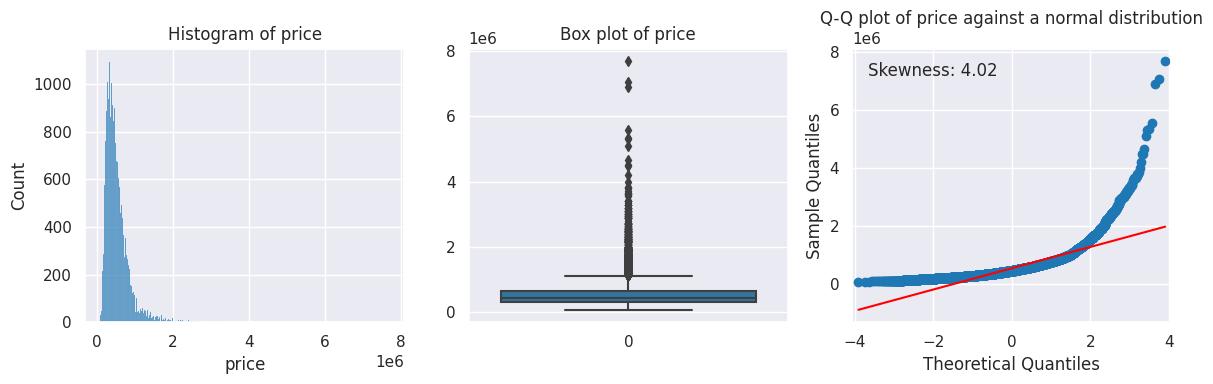

In [ ]:
plots_for_checking_outliers (df,'price')

In [ ]:
# descpritive statistics before
before_desc =df['price'].describe()

In [ ]:
from scipy import stats
# create z scores of price in data
df['z_scores'] = pd.Series(stats.zscore(df['price']))

In [ ]:
# Compute z_scores of each data point and drop rows of outliers by zscores
from scipy import stats
def drop_outliers_by_zscore (data, column, lower, upper):
  z = pd.Series(stats.zscore(data[column]))
  data = data.drop(data[(z >= upper) | (z <= lower)].index)

In [ ]:
from scipy.stats import rankdata
# Compute the percentile rank of each data point and drop rows of outliers by percentiles
def drop_outliers_by_percentile (data, column, lower, upper):
  p = pd.Series((rankdata(data[column]) / len(data))*100)
  data = data.drop(data[(p >= upper) | (p <= lower)].index)

In [ ]:
from scipy.stats import rankdata

def drop_outliers_by_percentiles(data, column, lower_percentile, upper_percentile):
    """
    Drops rows from a Pandas DataFrame based on percentiles of a given column.

    Parameters:
    data (pandas.DataFrame): The input data.
    column (str): The name of the column to use for computing percentiles.
    lower_percentile (float): The lower percentile bound (between 0 and 100).
    upper_percentile (float): The upper percentile bound (between 0 and 100).

    Returns:
    pandas.DataFrame: The modified DataFrame with outliers dropped.
    """
    # Check input arguments
    if column not in data.columns:
        raise ValueError("Column '%s' not found in data." % column)
    if not (0 <= lower_percentile <= 100):
        raise ValueError("Lower percentile bound must be between 0 and 100.")
    if not (0 <= upper_percentile <= 100):
        raise ValueError("Upper percentile bound must be between 0 and 100.")

    # Compute percentiles
    percentiles = pd.Series((rankdata(data[column]) / len(data)) * 100)

    # Drop outliers outside bounds
    mask = (percentiles >= upper_percentile) | (percentiles <= lower_percentile)
    return data.loc[~mask]

In [ ]:
from scipy import stats

def drop_outliers_by_zscores(data, column, lower_zscore, upper_zscore):
    """
    Drops rows from a Pandas DataFrame based on z-scores of a given column.

    Parameters:
    data (pandas.DataFrame): The input data.
    column (str): The name of the column to use for computing z-scores.
    lower_zscore (float): The lower z-score boundary.
    upper_zscore (float): The upper z-score boundary.

    Returns:
    pandas.DataFrame: The modified DataFrame with outliers dropped.
    """
    # Check input arguments
    if column not in data.columns:
        raise ValueError("Column '%s' not found in data." % column)
    if not np.isfinite(lower_zscore):
        raise ValueError("Lower z-score boundary must be finite.")
    if not np.isfinite(upper_zscore):
        raise ValueError("Upper z-score boundary must be finite.")

    # Compute z-scores
    z_scores = pd.Series(stats.zscore(data[column]), index=data.index)

    # Drop outliers outside boundaries
    mask = (z_scores >= upper_zscore) | (z_scores <= lower_zscore)
    return data.loc[~mask]

In [ ]:
def clip_outliers_by_percentile (data, column, lower, upper):
  p_upper = np.percentile(data[column],upper)
  p_lower = np.percentile(data[column],lower)
  data[column] = data[column].clip(p_lower,p_upper)

In [ ]:
def clip_outliers_by_zscore (data, column, upper_zscore, lower_zscore):
  mu = np.mean(data[column])
  sigma = np.std(data[column])
  lower_value = lower_zscore * sigma + mu
  upper_value = upper_zscore * sigma + mu
  data[column] = data[column].clip(lower_value,upper_value)

In [ ]:
def clip_outliers_by_zscores(data, column, upper_zscore, lower_zscore):
    """
    Clips the outliers of a column in a Pandas DataFrame based on z-scores.

    Parameters:
    data (pandas.DataFrame): The input data.
    column (str): The name of the column to clip.
    lower_zscore (float): The lower z-score boundary.
    upper_zscore (float): The upper z-score boundary.

    Returns:
    pandas.DataFrame: The modified DataFrame with outliers clipped.
    """
    # Check input arguments
    if column not in data.columns:
        raise ValueError("Column '%s' not found in data." % column)
    if not np.isfinite(lower_zscore):
        raise ValueError("Lower z-score boundary must be finite.")
    if not np.isfinite(upper_zscore):
        raise ValueError("Upper z-score boundary must be finite.")

    # Compute mean and standard deviation
    mean = np.mean(data[column])
    std_dev = np.std(data[column])

    # Compute lower and upper value bounds based on z-scores
    lower_value = lower_zscore * std_dev + mean
    upper_value = upper_zscore * std_dev + mean

    # Clip outliers
    data_clipped = data.copy()
    data_clipped[column] = data_clipped[column].clip(lower_value, upper_value)

    return data_clipped

In [ ]:
def clip_outliers_by_percentiles(data, column, lower_percentile, upper_percentile):
    """
    Clips the outliers of a column in a Pandas DataFrame based on percentiles.

    Parameters:
    data (pandas.DataFrame): The input data.
    column (str): The name of the column to clip.
    lower_percentile (float): The lower percentile bound (between 0 and 100).
    upper_percentile (float): The upper percentile bound (between 0 and 100).

    Returns:
    pandas.DataFrame: The modified DataFrame with outliers clipped.
    """
    # Check input arguments
    if column not in data.columns:
        raise ValueError("Column '%s' not found in data." % column)
    if not (0 <= lower_percentile <= 100):
        raise ValueError("Lower percentile bound must be between 0 and 100.")
    if not (0 <= upper_percentile <= 100):
        raise ValueError("Upper percentile bound must be between 0 and 100.")

    # Compute percentiles
    p_upper = np.percentile(data[column], upper_percentile)
    p_lower = np.percentile(data[column], lower_percentile)

    # Clip outliers
    data[column] = data[column].clip(p_lower, p_upper)
    return data

In [ ]:
clip_outliers_by_percentiles (df, 'sqft_living', 1, 99)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650.0,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242.0,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000.0,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000.0,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080.0,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131.0,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813.0,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350.0,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388.0,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
clip_outliers_by_zscores (df, 'sqft_lot', -3, 3.5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650.0,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242.0,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000.0,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000.0,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080.0,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131.0,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813.0,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350.0,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388.0,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year', 'month',
       'dayofweek', 'z_scores'],
      dtype='object')

In [ ]:
# function for merging descriptive statistics of non-null categories with descriptive statistics of null category in groupby operation
# compare descriptive statistics of dependent variable between null categories and non-null categories
def merge_null_groupby (data, dependent_var, cat_var_with_null):
  group1 = data.groupby(cat_var_with_null).describe()[dependent_var]
  group2 = data[data[cat_var_with_null].isnull()].describe()[dependent_var]
  group1_t = group1.transpose()
  merged_null = pd.merge(group1_t, group2, on=group1_t.index)
  merged_null = merged_null.rename(columns={'key_0':'descriptive stats',dependent_var: 'null'})
  print(merged_null)

In [ ]:
#clipping outliers and covert to bottom 1% or top 99% value: apply to multiple columns
for i in range(0,11):
    p01 = np.percentile(df.iloc[:,i], 1)
    p98 = np.percentile(df.iloc[:,i], 99)
    df.iloc[:,i] = df.iloc[:,i].clip(lower=p01, upper=p99)

In [ ]:
#clipping outliers and covert outliers to bottom 1% or top 99% value: apply to 'grade' column
p01 = np.percentile(df.iloc[:,10], 1)
p99 = np.percentile(df.iloc[:,10], 99)
df.iloc[:,10] = df.iloc[:,10].clip(lower=p01, upper=p99)

In [ ]:
#drop when value counts (frequency) of an interger veriable are less than a specific frequency
mask = df['grade'].map(df['grade'].value_counts()) <= 1
df_after = df.drop(index=df[mask].index)

In [ ]:
before_desc = df ['price'].describe
df_after_drop
# descriptive statitics after
after_desc = df_after['price'].describe()
# merge two descriptive statistics
merged_desc = pd.merge(before_desc, after_desc, on=before_desc.index)
merged_desc = merged_desc.rename(columns={'key_0':'statistics','price_x': 'befor', 'price_y':'after'})
merged_desc

  statistics         befor         after
0      count  2.159700e+04  2.131500e+04
1       mean  5.402966e+05  5.140884e+05
2        std  3.673681e+05  2.747863e+05
3        min  7.800000e+04  7.800000e+04
4        25%  3.220000e+05  3.200000e+05
5        50%  4.500000e+05  4.499000e+05
6        75%  6.450000e+05  6.329625e+05
7        max  7.700000e+06  1.820000e+06


In [ ]:
df['grade'].value_counts()/len(df)

7     0.415540
8     0.280839
9     0.121087
6     0.094369
10    0.052510
11    0.018476
5     0.011206
12    0.004121
4     0.001250
13    0.000602
Name: grade, dtype: float64

In [ ]:
#clip values to specified lower and upper vaules
df['grade'] = df['grade'].clip(lower=4, upper=12)

In [ ]:
df['grade'].value_counts()

7     8973
8     6053
9     2579
6     2038
10    1048
11     307
5      242
12      47
4       28
Name: grade, dtype: int64

In [ ]:
df['condition'].value_counts()

3    14020
4     5677
5     1700
2      170
1       29
Name: condition, dtype: int64

In [ ]:
df['bedrooms'].value_counts()

3     9793
4     6792
2     2759
5     1544
6      260
1      196
7       33
8       11
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [ ]:
#clip values to specified lower and upper vaules
df['bedrooms'] = df['bedrooms'].clip(lower=1, upper=7)

In [ ]:
df['bedrooms'].value_counts()

3    9824
4    6882
2    2760
5    1601
6     272
1     196
7      62
Name: bedrooms, dtype: int64

<Axes: xlabel='bedrooms', ylabel='count'>

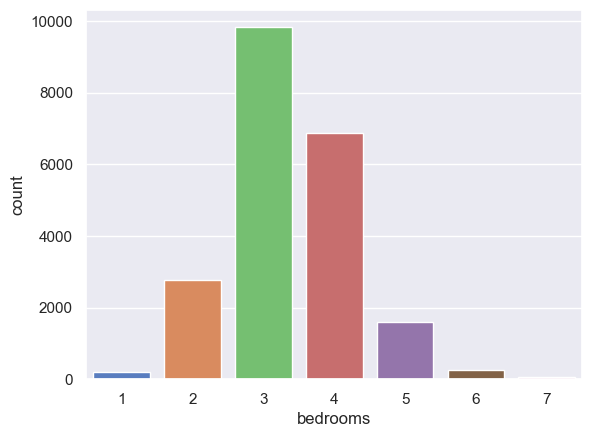

In [ ]:
sns.countplot(x='bedrooms', data=df,palette='muted')

In [ ]:
#clip values to specified lower and upper vaules
df['bathrooms'] = df['bathrooms'].clip(lower=1.5, upper=4)

In [ ]:
df['bathrooms'].value_counts()

1.50    5380
2.50    5377
1.75    3048
2.25    2047
2.00    1930
2.75    1185
3.00     753
3.50     731
3.25     589
4.00     402
3.75     155
Name: bathrooms, dtype: int64

<Axes: xlabel='bathrooms', ylabel='count'>

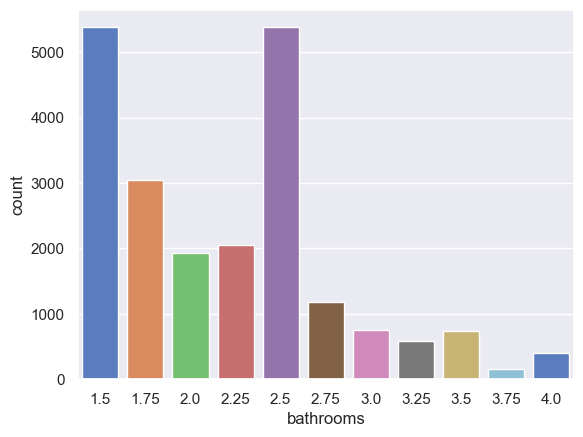

In [ ]:
sns.countplot(x='bathrooms', data=df,palette='muted')

In [ ]:
pivot = pd.pivot_table(df, values='price', index='grade', columns='bedrooms', aggfunc='mean')

In [ ]:
pivot

bedrooms,1,2,3,4,5,6
grade,,,,,,
1,241610.400000,2.451482e+05,2.342618e+05,2.583746e+05,3.280000e+05,2.816667e+05
2,302520.615385,3.003269e+05,2.923995e+05,3.264786e+05,3.626549e+05,4.490612e+05
3,374641.176471,4.117598e+05,3.813169e+05,4.269392e+05,4.571775e+05,5.085812e+05
4,443471.857143,4.971186e+05,5.165092e+05,5.613475e+05,6.203531e+05,6.686890e+05
5,533250.000000,7.016242e+05,7.108839e+05,7.637710e+05,8.936580e+05,9.549026e+05
6,316000.000000,9.786880e+05,9.359825e+05,9.688098e+05,1.148470e+06,1.275285e+06
7,NaN,1.547500e+06,1.225549e+06,1.277275e+06,1.334195e+06,1.326923e+06


<Axes: xlabel='grade'>

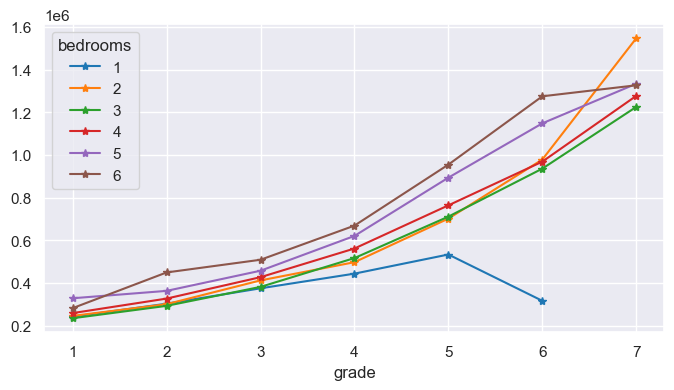

In [ ]:
pivot.plot.line(figsize=(8,4), marker='*')

<Figure size 800x600 with 0 Axes>

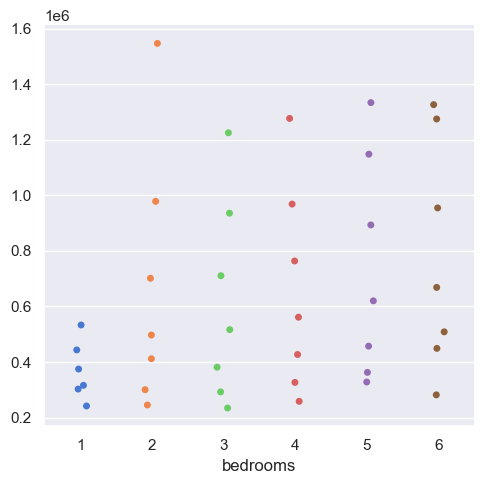

<Figure size 800x600 with 0 Axes>

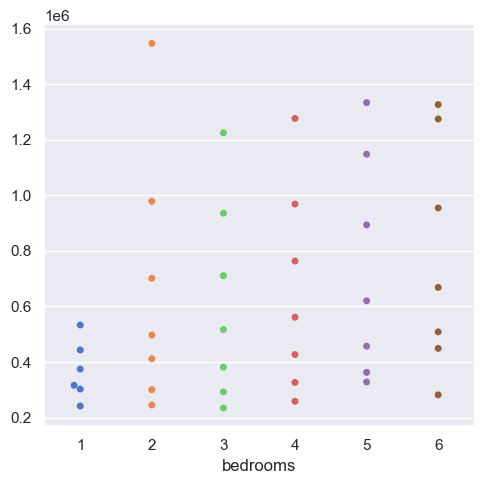

<Figure size 800x600 with 0 Axes>

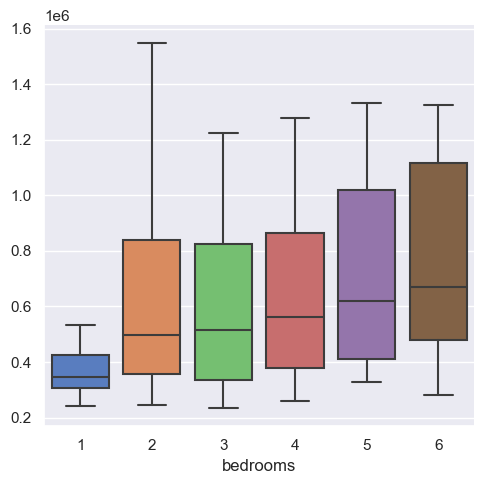

<Figure size 800x600 with 0 Axes>

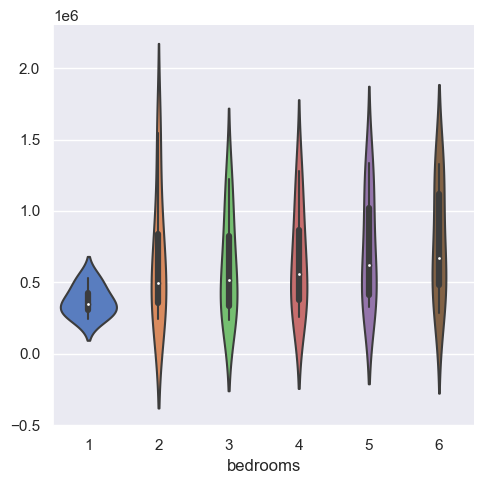

<Figure size 800x600 with 0 Axes>

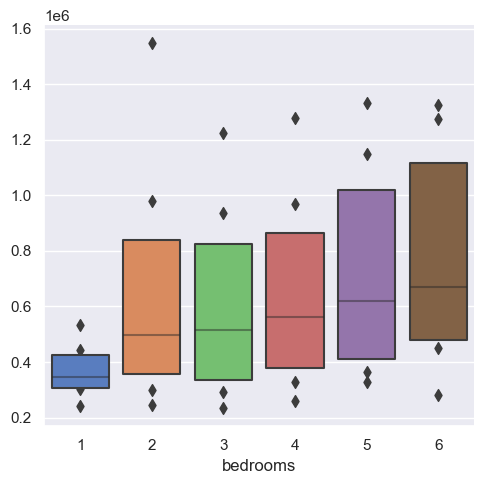

<Figure size 800x600 with 0 Axes>

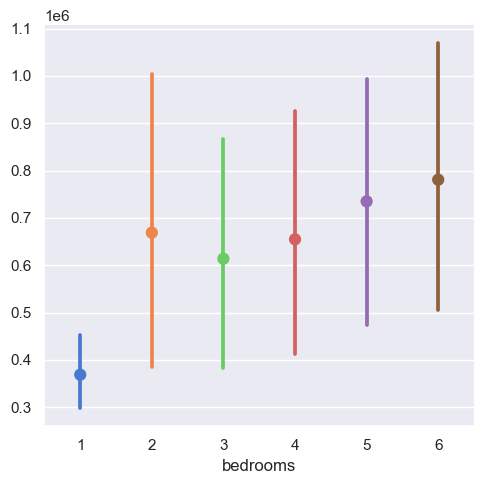

<Figure size 800x600 with 0 Axes>

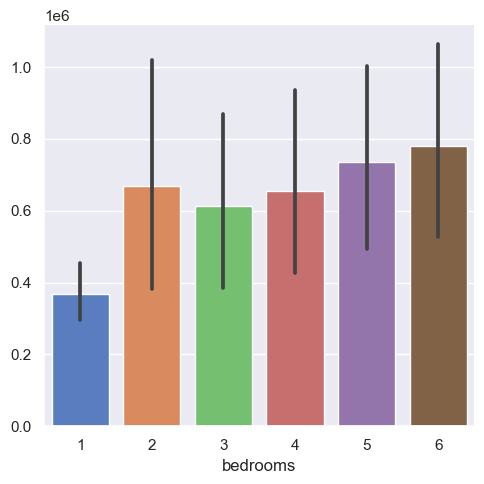

In [ ]:
kind = ["strip", "swarm", "box", "violin","boxen", "point", "bar"]
for i in kind:
    plt.figure(figsize=(8,6))
    sns.catplot(data=pivot, kind=i, palette ='muted')
    plt.tight_layout()

In [ ]:
df['waterfront'].value_counts()

0    21282
1      117
Name: waterfront, dtype: int64

C:\Users\young\AppData\Local\Temp\ipykernel_3828\3443196334.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap='magma', linecolor='white', linewidth=1)


<Axes: >

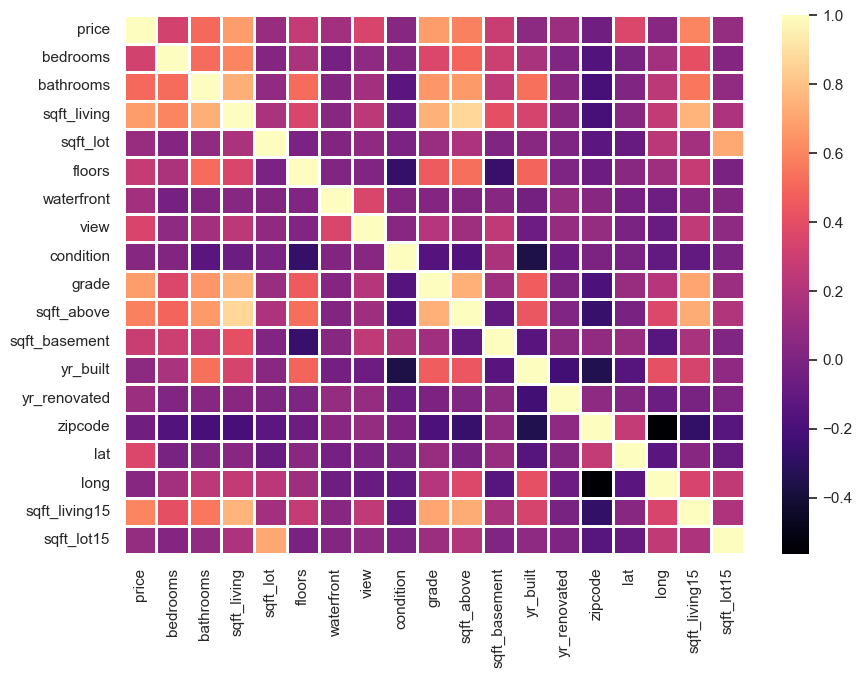

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),cmap='magma', linecolor='white', linewidth=1)

In [ ]:
df.corr()['price'].sort_values(ascending=False)

C:\Users\young\AppData\Local\Temp\ipykernel_3828\1745294458.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['price'].sort_values(ascending=False)


price            1.000000
sqft_living      0.679763
grade            0.679268
sqft_living15    0.601397
sqft_above       0.584891
bathrooms        0.505181
lat              0.361783
view             0.349385
bedrooms         0.325242
sqft_basement    0.285875
floors           0.278635
waterfront       0.149645
yr_renovated     0.117513
sqft_lot         0.101722
sqft_lot15       0.090721
yr_built         0.064573
long             0.041677
condition        0.035226
zipcode         -0.046597
Name: price, dtype: float64

In [ ]:
df.corr()['sqft_living'].sort_values(ascending=False)

C:\Users\young\AppData\Local\Temp\ipykernel_3828\1925553187.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['sqft_living'].sort_values(ascending=False)


sqft_living      1.000000
sqft_above       0.867975
sqft_living15    0.754699
grade            0.747798
bathrooms        0.736854
price            0.679763
bedrooms         0.600718
sqft_basement    0.406678
floors           0.353921
yr_built         0.338840
long             0.262402
view             0.241115
sqft_lot15       0.185826
sqft_lot         0.175100
lat              0.042131
yr_renovated     0.041517
waterfront       0.035489
condition       -0.069426
zipcode         -0.205000
Name: sqft_living, dtype: float64

# Exercises

** Recreate the plots below using the titanic dataframe. There are very few hints since most of the plots can be done with just one or two lines of code and a hint would basically give away the solution. Keep careful attention to the x and y labels for hints.**

** *Note! In order to not lose the plot image, make sure you don't code in the cell that is directly above the plot, there is an extra cell above that one which won't overwrite that plot!* **

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1000x600 with 0 Axes>

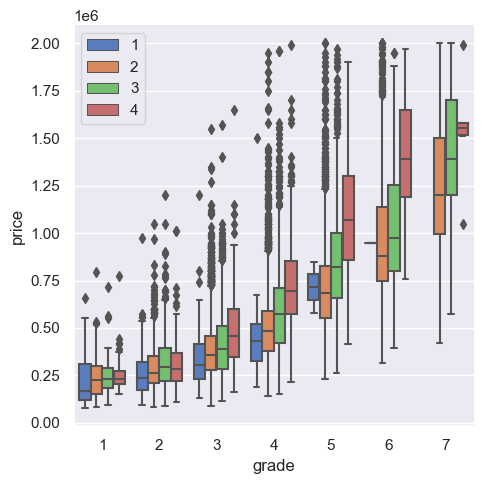

<Figure size 1000x600 with 0 Axes>

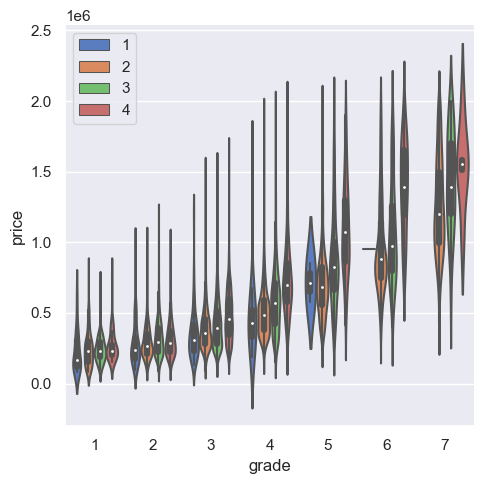

<Figure size 1000x600 with 0 Axes>

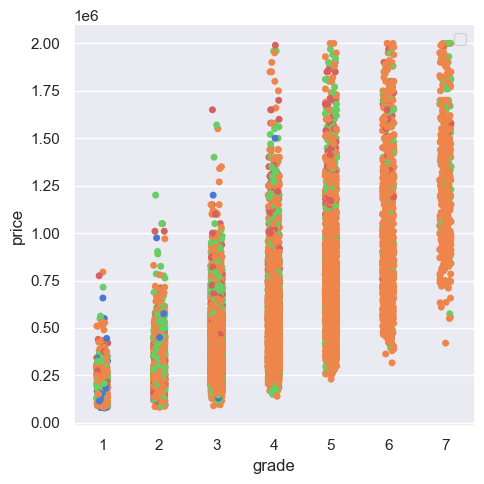

<Figure size 1000x600 with 0 Axes>

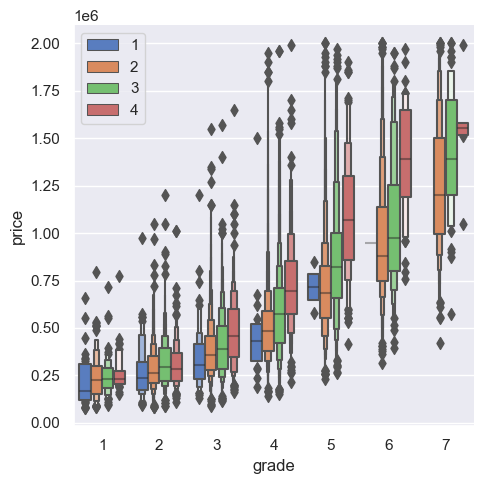

<Figure size 1000x600 with 0 Axes>

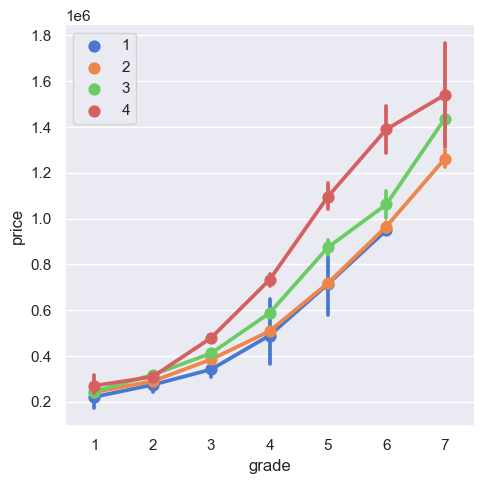

In [ ]:
kind = ['box', 'violin', 'strip','boxen', 'point']
for i in kind:
    plt.figure(figsize=(10,6))
    sns.catplot (x='grade', y='price', hue='condition',data=df, kind = i, palette='muted', legend=False)
    plt.tight_layout()
    plt.legend(loc=0)

ValueError: Use of `hue` with `kind='hex'` is not currently supported.

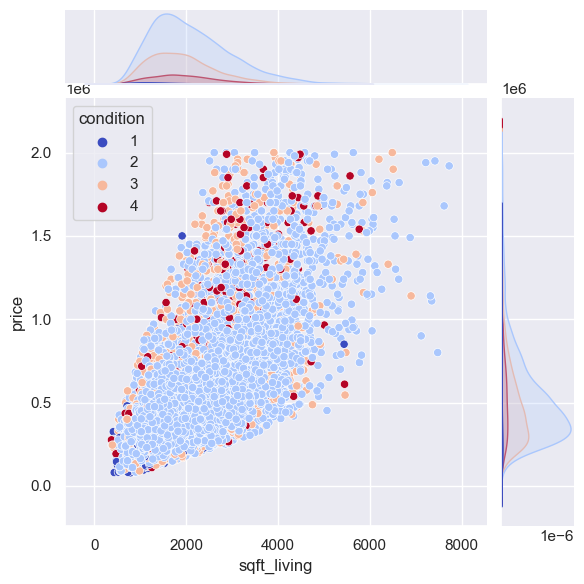

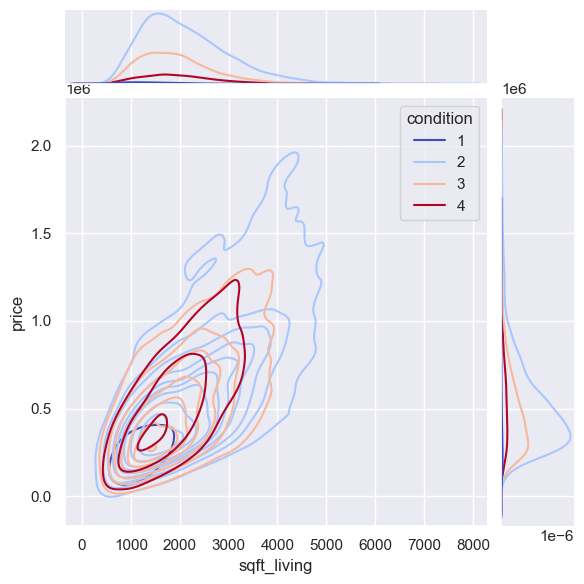

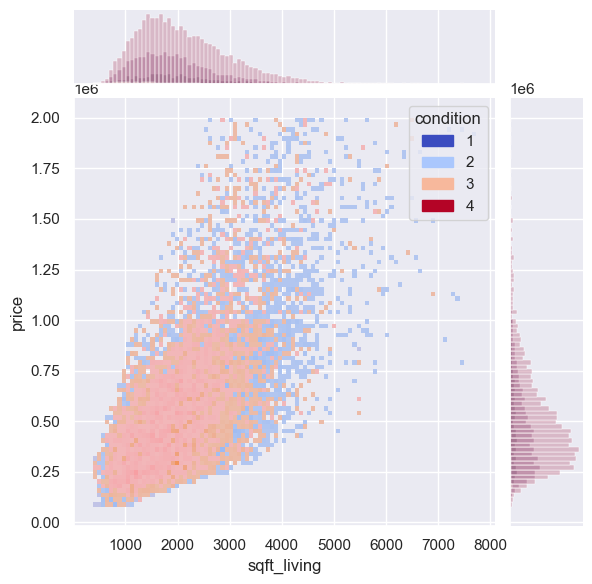

In [ ]:
kind = ['scatter', "kde", "hist" , "hex", "resid"]
for i in kind:
    sns.jointplot(x='sqft_living',y='price', hue='condition', data=df, kind=i, palette='coolwarm')

<Figure size 1000x600 with 0 Axes>

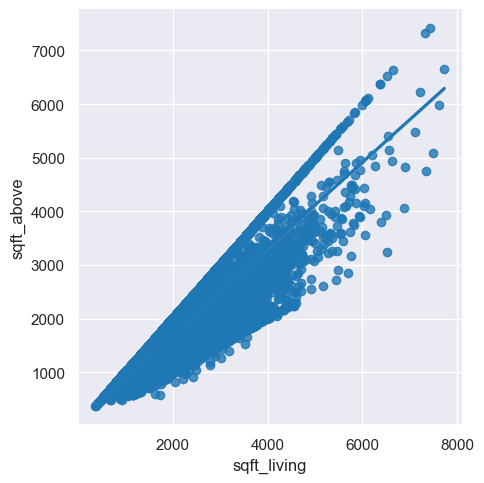

In [ ]:
plt.figure(figsize=(10,6))
sns.lmplot(x='sqft_living',y='sqft_above', data=df, palette='coolwarm')

<Axes: xlabel='sqft_living', ylabel='price'>

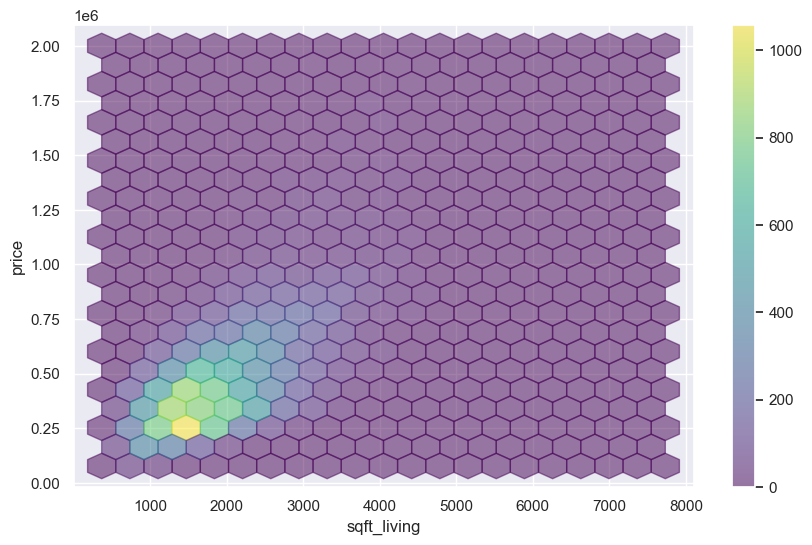

In [ ]:
df.plot.hexbin(x='sqft_living', y='price', gridsize=20,figsize=(10,6),cmap='viridis',alpha=0.5 )

<Axes: xlabel='grade'>

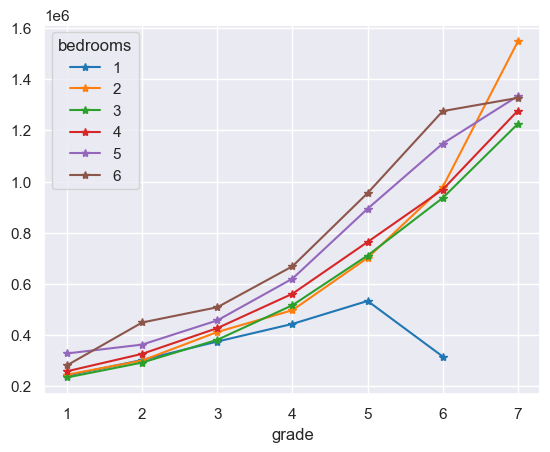

In [ ]:
 pivot.plot.line(marker='*')

<Axes: xlabel='class', ylabel='age'>

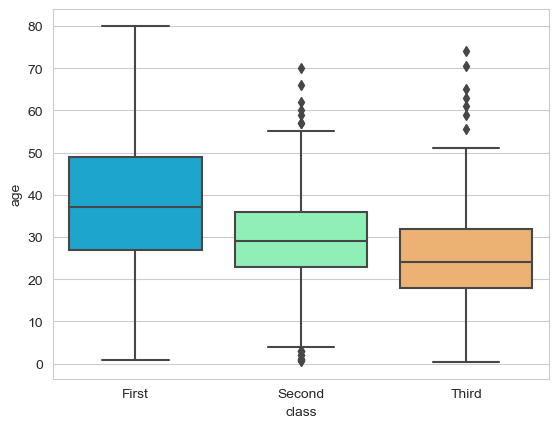

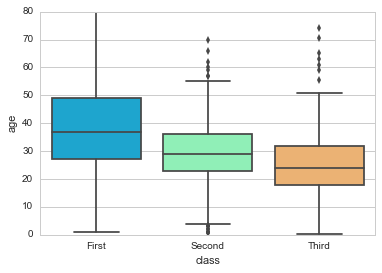

<Axes: xlabel='class', ylabel='age'>

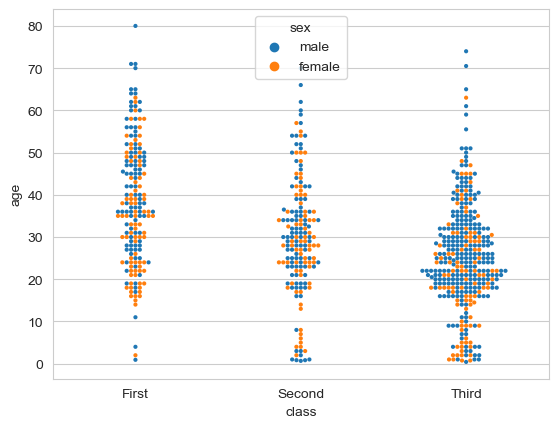

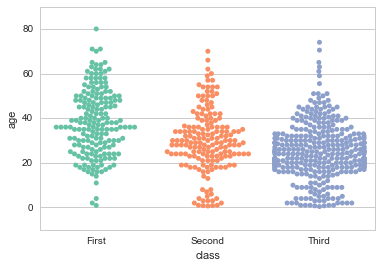

<Axes: xlabel='sex', ylabel='count'>

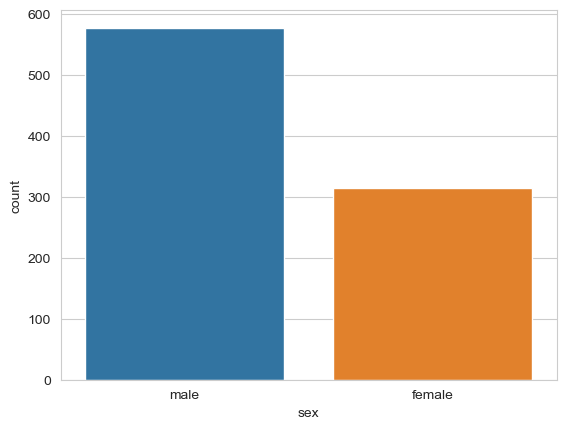

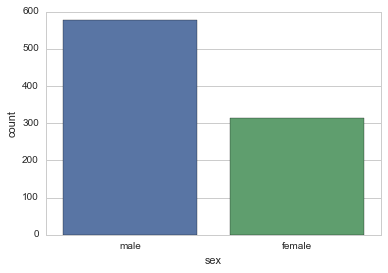

C:\Users\young\AppData\Local\Temp\ipykernel_22904\2371506923.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  tc = titanic.corr()


<Axes: >

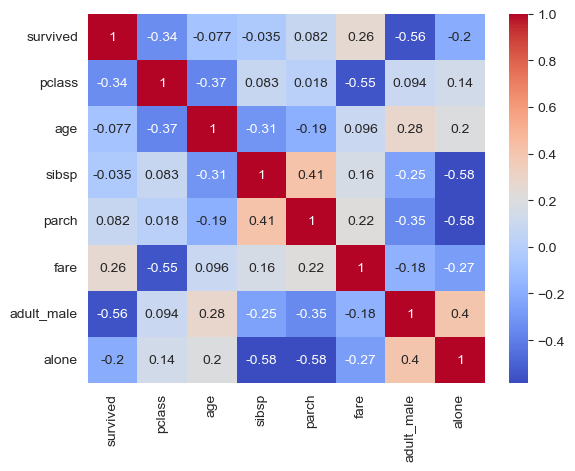

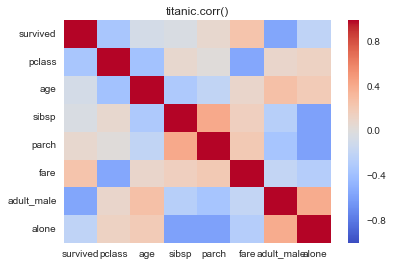

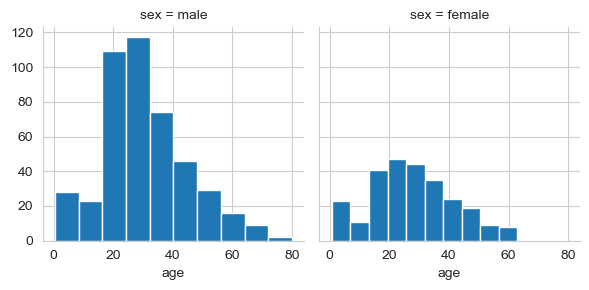

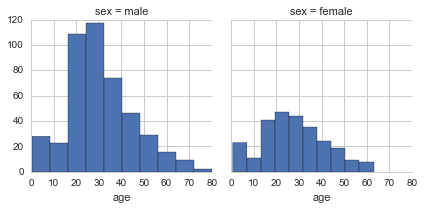

# Great Job!

### That is it for now! We'll see a lot more of seaborn practice problems in the machine learning section!